In [1]:
%%capture
!pip install git+https://github.com/huggingface/diffusers.git
!pip install accelerate
!pip install datasets
!pip install bitsandbytes

In [ ]:
!git clone https://huggingface.co/datasets/Monke64/Music2Image
!git clone https://github.com/huggingface/diffusers.git

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
!pip install -U peft

In [ ]:
# MODEL_NAME="runwayml/stable-diffusion-v1-5"
# OUTPUT_DIR="/sddata/finetune/lora/music2image"
# HUB_MODEL_ID="music2image_sd"
# DATASET_NAME="Monke64/Music2Image"

# !accelerate launch --mixed_precision="fp16"  diffusers/examples/text_to_image/train_text_to_image_lora.py \
#   --pretrained_model_name_or_path=$MODEL_NAME \
#   --dataset_name=$DATASET_NAME \
#   --dataloader_num_workers=8 \
#   --resolution=512 \
#   --center_crop \
#   --random_flip \
#   --train_batch_size=1 \
#   --gradient_accumulation_steps=4 \
#   --max_train_steps=15000 \
#   --learning_rate=1e-04 \
#   --max_grad_norm=1 \
#   --lr_scheduler="cosine" \
#   --lr_warmup_steps=0 \
#   --output_dir=${OUTPUT_DIR} \
#   --push_to_hub \
#   --hub_model_id=${HUB_MODEL_ID} \
#   --report_to=wandb \
#   --checkpointing_steps=500 \
#   --validation_prompt="The track belongs to the blues-rock genre" \
#   --seed=1337

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from diffusers import StableDiffusionPipeline
import torch
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/content/drive/MyDrive/emotifymusic/pytorch_lora_weights.safetensors", weight_name="pytorch_lora_weights.safetensors")
image = pipeline("The track belongs to the blues-rock genre, showcasing a fusion of blues and rock elements. It exudes a sense of longing, introspection, and a touch of melancholy, capturing the listener's attention with its emotive style").images[0]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

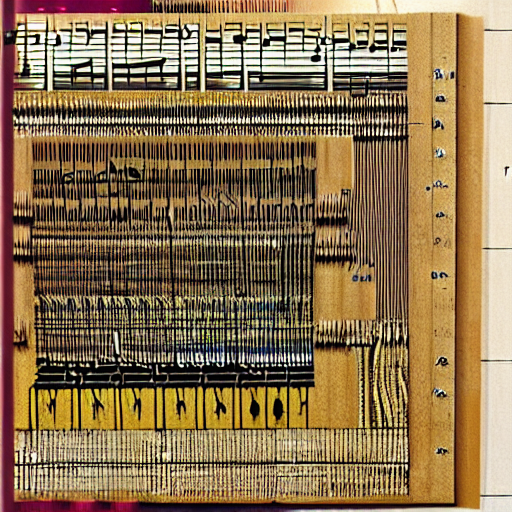

In [10]:
text_prompt = "This piece of music falls under the classical genre. It is of tempo 112 and evokes a sense of tenderness."
image = pipeline(text_prompt).images[0]
image